# stats

The UN Environment Program(UNEP2) reports that an increase of 14% by
2030, 30% by the end of 2050, and 50% by the end of the century in extreme global wildfires is to be
expected [Sullivan et al., 2022].

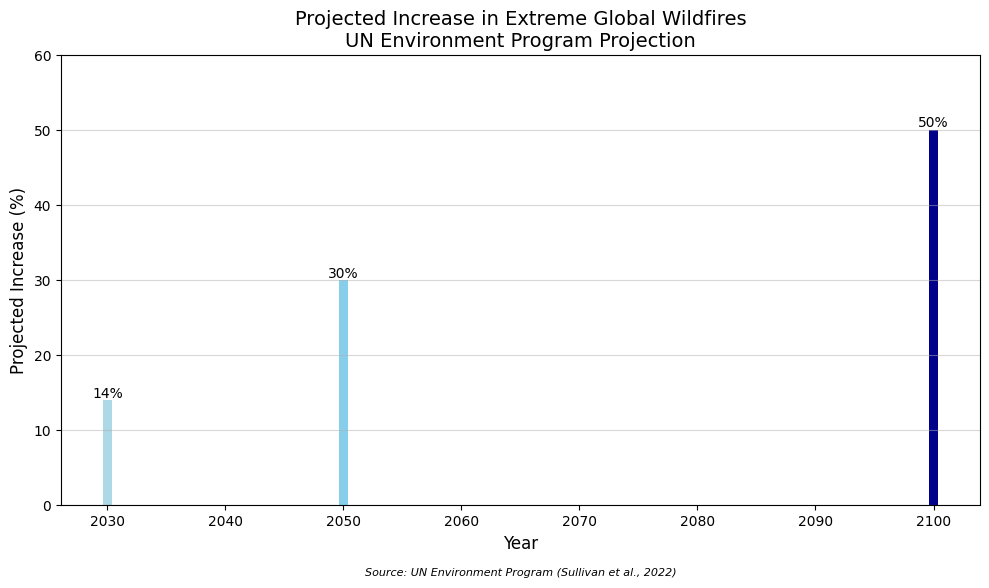

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def create_wildfire_projection_plot():
    """
    Create a bar plot visualizing UN Environment Program's wildfire projections
    """
    # Data from the citation
    years = [2030, 2050, 2100]
    increase_percentages = [14, 30, 50]

    # Create the plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(years, increase_percentages, color=['lightblue', 'skyblue', 'darkblue'])
    
    # Customize the plot
    plt.title('Projected Increase in Extreme Global Wildfires\nUN Environment Program Projection', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Projected Increase (%)', fontsize=12)
    plt.ylim(0, 60)  # Set y-axis to go up to 60%

    # Add percentage labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height}%',
                 ha='center', va='bottom', fontsize=10)

    # Add a subtle grid for readability
    plt.grid(axis='y', alpha=0.5)

    # Add a citation note
    plt.text(0.5, -0.15, 'Source: UN Environment Program (Sullivan et al., 2022)', 
             ha='center', va='center', transform=plt.gca().transAxes, 
             fontsize=8, style='italic')

    plt.tight_layout()
    plt.show()

# Run the plot creation
create_wildfire_projection_plot()

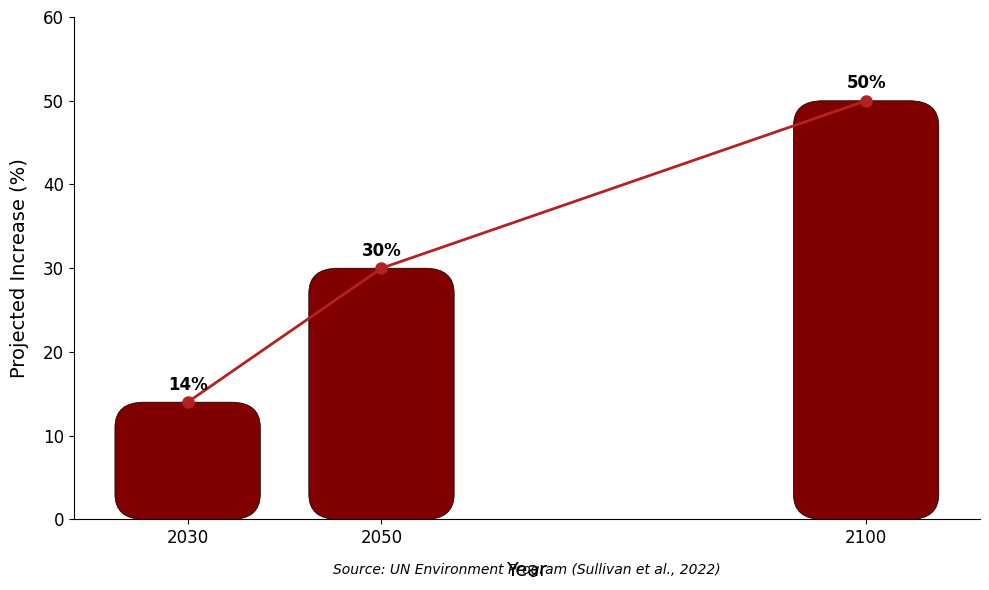

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import FancyBboxPatch

def create_wildfire_projection_plot():
    """
    Create a minimalist bar plot visualizing UN wildfire projections
    with rounded bars and no grid or title
    """
    # Data from the citation
    years = [2030, 2050, 2100]
    increase_percentages = [14, 30, 50]
    
    # Create custom colormap from black to red
    colors = [(0.5, 0, 0), (0.5, 0, 0), (0.5, 0, 0)]
    cmap_name = 'black_to_red'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=len(years))
    
    # Create the plot with clean aesthetic
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor('white')
    
    # We'll manually draw rounded rectangles instead of using bar()
    bar_width = 15
    
    for i, (year, percentage) in enumerate(zip(years, increase_percentages)):
        # Create rounded rectangle
        fancy_box = FancyBboxPatch(
            (year - bar_width/2, 0),  # lower left corner
            bar_width,                # width
            percentage,               # height
            boxstyle=f"round,pad=0,rounding_size={3}",
            facecolor=cm(i/len(years)),
            linewidth=0.5
        )
        
        # Add fancy box to plot
        ax.add_patch(fancy_box)
    
    # Add trend line
    ax.plot(years, increase_percentages, color='firebrick', 
           linestyle='-', linewidth=2, marker='o', markersize=8)
    
    # Customize the plot - minimalist approach
    ax.set_xlabel('Year', fontsize=14, labelpad=10)
    ax.set_ylabel('Projected Increase (%)', fontsize=14, labelpad=10)
    ax.set_ylim(0, 60)  # Set y-axis to go up to 60%
    
    # Set specific x-ticks for only the years with data
    ax.set_xticks(years)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Remove grid and spines for minimalist look
    ax.grid(False)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    
    # Add percentage labels on top of each bar
    for year, percentage in zip(years, increase_percentages):
        ax.text(year, percentage + 1, f'{percentage}%',
               ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    # Add a citation note
    ax.text(0.5, -0.1, 'Source: UN Environment Program (Sullivan et al., 2022)', 
           ha='center', va='center', transform=ax.transAxes, 
           fontsize=10, style='italic')
    
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('wildfire_projection_chart.png', dpi=300, bbox_inches='tight')
    
    plt.show()

# Run the plot creation function
create_wildfire_projection_plot()


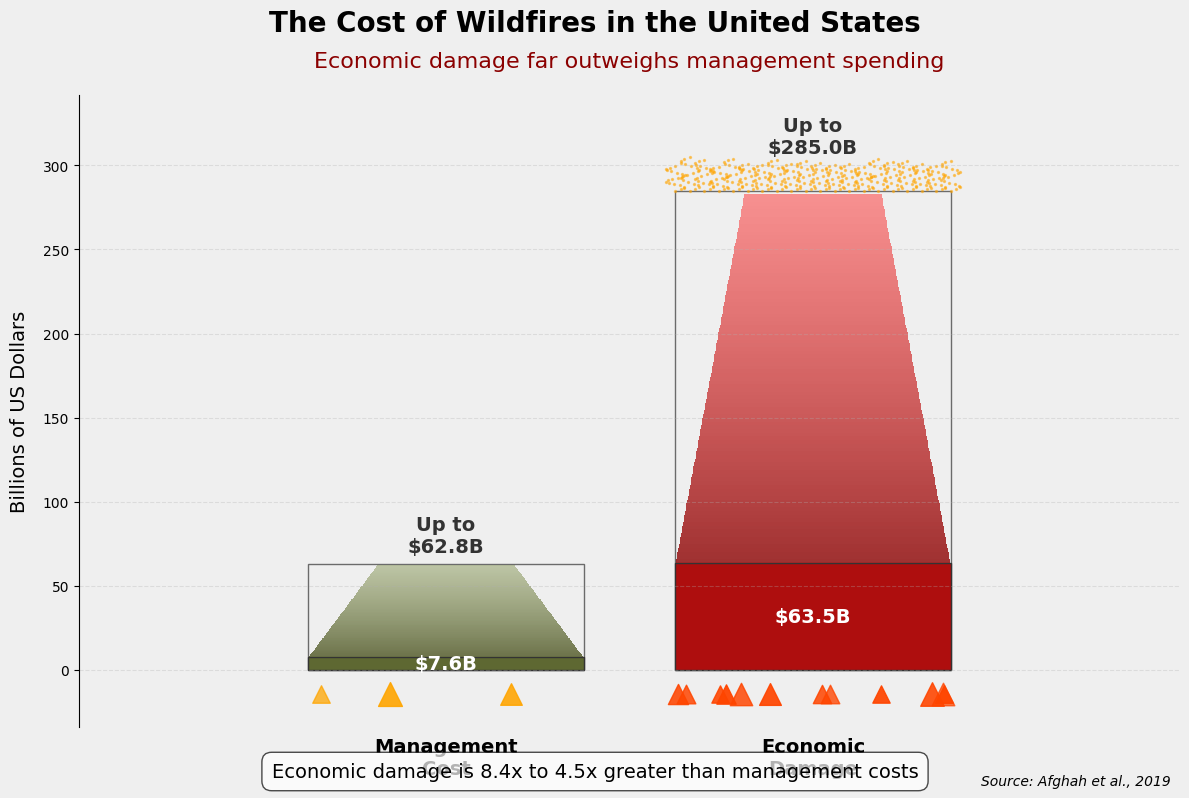

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches

def create_wildfire_economics_plot():
    """
    Create a creative visualization comparing wildfire management costs to economic damage
    """
    # Data from the citation
    categories = ['Management\nCost', 'Economic\nDamage']
    min_values = [7.6, 63.5]  # billions USD
    max_values = [62.8, 285.0]  # billions USD
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8), facecolor='#EFEFEF')
    
    # Set up positions
    x_positions = [0.3, 0.7]
    bar_width = 0.15
    
    # Create fire-themed colormaps
    management_colors = LinearSegmentedColormap.from_list('management', 
                                                      ['#4B5320', '#8A9A5B']) # Olive green
    damage_colors = LinearSegmentedColormap.from_list('damage', 
                                                   ['#8B0000', '#FF3030']) # Dark to bright red
    
    # Create gradients for the bars
    gradient_resolution = 100
    gradient_y = np.linspace(0, 1, gradient_resolution)
    
    # Draw the bars with gradient effect and rounded tops
    for i, (pos, min_val, max_val) in enumerate(zip(x_positions, min_values, max_values)):
        cmap = damage_colors if i == 1 else management_colors
        
        # Draw the max value bar (background)
        ax.bar(pos, max_val, width=bar_width*2, color='none', 
              edgecolor='#333333', linewidth=1, alpha=0.7)
        
        # Draw min value with solid color
        ax.bar(pos, min_val, width=bar_width*2, color=cmap(0.3), 
              edgecolor='#333333', linewidth=1)
        
        # Add gradient from min to max
        for j, y in enumerate(gradient_y):
            if j == 0:
                continue
            height = min_val + y * (max_val - min_val)
            current_width = bar_width*2 * (1 - y*0.5)  # Make the bar taper at the top
            x_offset = pos - (current_width / 2)
            
            # Create a small rectangle for each segment of the gradient
            rect = patches.Rectangle(
                (x_offset, min_val + (j-1)/gradient_resolution * (max_val - min_val)),
                current_width,
                (max_val - min_val)/gradient_resolution,
                linewidth=0,
                edgecolor='none',
                facecolor=cmap(y),
                alpha=0.8 - 0.3*y  # Fade out toward the top
            )
            ax.add_patch(rect)
        
        # Add "flame" effect at the top for damage bar
        if i == 1:
            flame_height = 20
            flame_x = np.linspace(pos-bar_width, pos+bar_width, 20)
            flame_y_base = max_val
            
            for fx, amplitude in zip(flame_x, np.random.uniform(0.7, 1.0, size=20)):
                flame_y = np.linspace(flame_y_base, flame_y_base + flame_height*amplitude, 20)
                flame_x_wobble = fx + np.sin(np.linspace(0, 4*np.pi, 20)) * 0.01
                
                # Make the flame trail
                points = np.column_stack([flame_x_wobble, flame_y])
                ax.scatter(flame_x_wobble, flame_y, s=2, color='orange', alpha=0.5)
        
        # Add value labels
        ax.text(pos, min_val/2, f"${min_val}B", ha='center', va='center', 
               fontsize=14, fontweight='bold', color='white')
        
        ax.text(pos, max_val + (flame_height if i == 1 else 5), 
               f"Up to\n${max_val}B", ha='center', va='bottom', 
               fontsize=14, fontweight='bold', color='#333333')
    
    # Add fire icons at bottom
    for i, pos in enumerate(x_positions):
        num_fires = 3 if i == 0 else 12  # More fire icons for economic damage
        for j in range(num_fires):
            x_offset = np.random.uniform(-bar_width, bar_width)
            y_pos = -max(max_values) * 0.05
            size = np.random.uniform(7, 15)
            alpha = np.random.uniform(0.7, 1.0)
            color = '#FF4500' if i == 1 else '#FFA500'  # Red-orange for damage, orange for management
            ax.scatter(pos + x_offset, y_pos, s=size*20, marker='^', color=color, alpha=alpha)
    
    # Set axis limits and remove spines
    ax.set_xlim(-0.1, 1.1)
    y_max = max(max_values) * 1.2
    ax.set_ylim(-y_max*0.1, y_max)
    
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    
    # Add custom y-axis label
    ax.set_ylabel('Billions of US Dollars', fontsize=14, labelpad=10)
    
    # Remove x-axis line and ticks
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', which='both', bottom=False, labelbottom=True)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(categories, fontsize=14, fontweight='bold')
    
    # Add a stark title highlighting the disparity
    plt.suptitle('The Cost of Wildfires in the United States', 
               fontsize=20, y=0.98, fontweight='bold')
    
    plt.title('Economic damage far outweighs management spending', 
             fontsize=16, pad=20, color='#8B0000')
    
    # Add annotation explaining the disparity
    ratio_min = round(min_values[1] / min_values[0], 1)
    ratio_max = round(max_values[1] / max_values[0], 1)
    
    plt.figtext(0.5, 0.02, 
               f"Economic damage is {ratio_min}x to {ratio_max}x greater than management costs",
               ha='center', fontsize=14, bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))
    
    # Add citation
    plt.figtext(0.98, 0.01, 'Source: Afghah et al., 2019', 
               ha='right', fontsize=10, style='italic')
    
    # Set background with subtle grid
    ax.set_facecolor('#EFEFEF')
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('wildfire_economics.png', dpi=300, bbox_inches='tight')
    plt.show()

# Generate the visualization
create_wildfire_economics_plot()

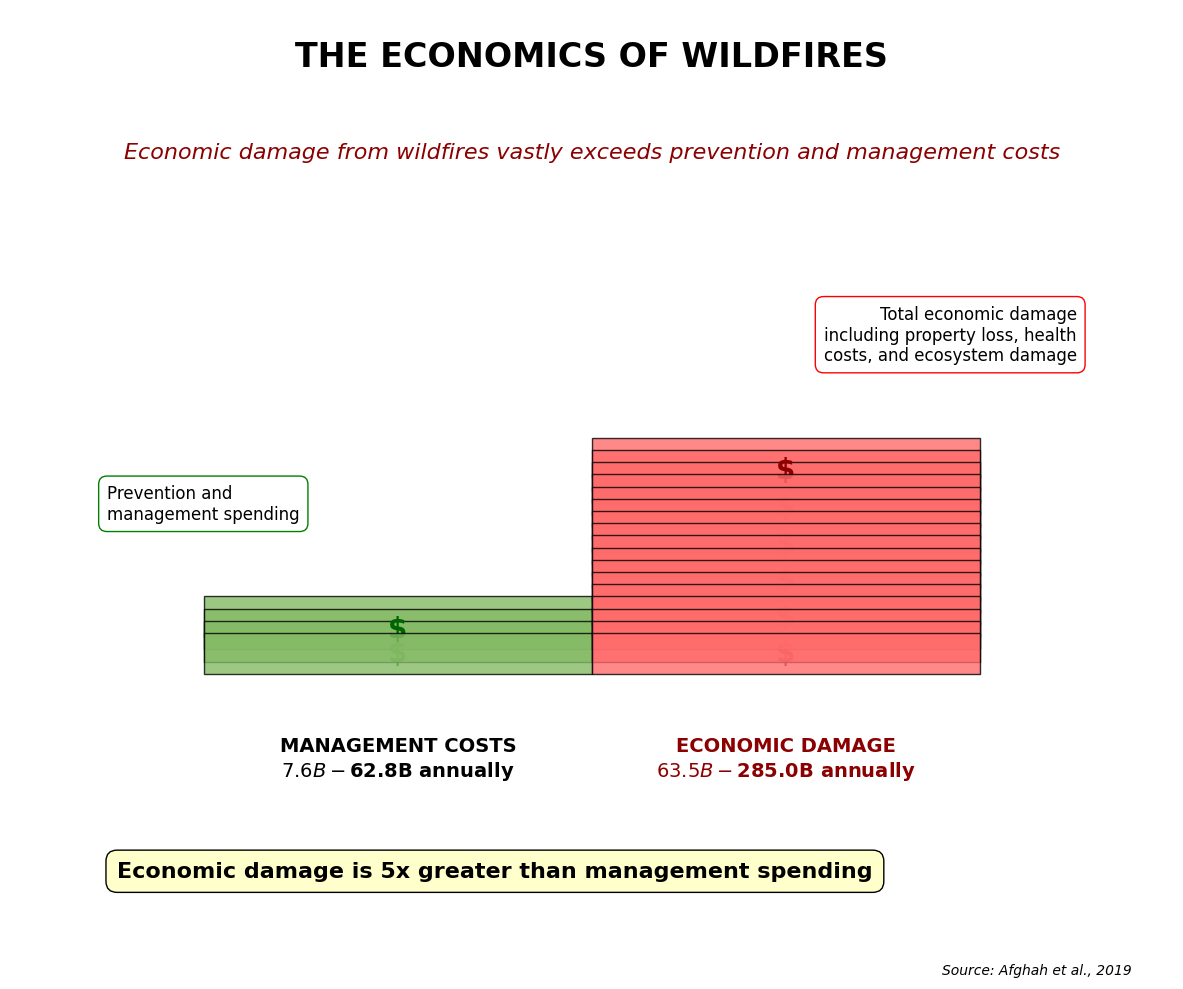

In [15]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import numpy as np

def create_wildfire_economics_infographic():
    """
    Create an infographic-style visualization comparing wildfire costs
    """
    # Data from the citation
    management_min, management_max = 7.6, 62.8  # billions USD
    damage_min, damage_max = 63.5, 285.0  # billions USD
    
    # Calculate average values for simplified representation
    management_avg = (management_min + management_max) / 2  # ~35.2B
    damage_avg = (damage_min + damage_max) / 2  # ~174.25B
    
    # Create figure with custom layout
    fig = plt.figure(figsize=(12, 10), facecolor='white')
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])
    
    # Top section - title and key facts
    ax_top = plt.subplot(gs[0])
    ax_top.axis('off')
    
    # Bottom section - visual comparison
    ax_bottom = plt.subplot(gs[1])
    
    # Title and key message
    ax_top.text(0.5, 0.8, 'THE ECONOMICS OF WILDFIRES', 
               fontsize=24, fontweight='bold', ha='center', va='center')
    
    ax_top.text(0.5, 0.4, 
               'Economic damage from wildfires vastly exceeds prevention and management costs', 
               fontsize=16, ha='center', va='center', style='italic', color='#8B0000')
    
    # Create dollar bill icons to represent costs
    bill_width = 0.4
    bill_height = 0.2
    management_bills = int(round(management_avg / 10))  # Each bill = $10B
    damage_bills = int(round(damage_avg / 10))  # Each bill = $10B
    
    # Management cost stack (green bills)
    for i in range(management_bills):
        y_pos = i * bill_height * 0.3
        bill = Rectangle((0.2, y_pos), bill_width, bill_height, 
                        facecolor='#85bb65', edgecolor='black', linewidth=1, alpha=0.8,
                        zorder=management_bills-i)
        ax_bottom.add_patch(bill)
        
        # Add dollar sign to each bill
        if i % 2 == 0:  # Add $ to every other bill
            ax_bottom.text(0.2 + bill_width/2, y_pos + bill_height/2, '$', 
                          color='darkgreen', fontsize=20, ha='center', va='center', 
                          fontweight='bold')
    
    # Damage cost stack (red bills)
    for i in range(damage_bills):
        y_pos = i * bill_height * 0.3
        bill = Rectangle((0.6, y_pos), bill_width, bill_height, 
                        facecolor='#FF6B6B', edgecolor='black', linewidth=1, alpha=0.8,
                        zorder=damage_bills-i)
        ax_bottom.add_patch(bill)
        
        # Add dollar sign to each bill
        if i % 3 == 0:  # Add $ to every third bill
            ax_bottom.text(0.6 + bill_width/2, y_pos + bill_height/2, '$', 
                          color='darkred', fontsize=20, ha='center', va='center', 
                          fontweight='bold')
    
    # Add labels for the stacks
    ax_bottom.text(0.4, -0.5, f"MANAGEMENT COSTS\n${management_min}B - ${management_max}B annually", 
                  ha='center', fontsize=14, fontweight='bold')
    
    ax_bottom.text(0.8, -0.5, f"ECONOMIC DAMAGE\n${damage_min}B - ${damage_max}B annually", 
                  ha='center', fontsize=14, fontweight='bold', color='#8B0000')
    
    # Add explanatory callouts
    ax_bottom.text(0.1, management_bills * bill_height * 0.3 + 0.5, 
                  "Prevention and\nmanagement spending", 
                  fontsize=12, ha='left', va='bottom',
                  bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5'))
    
    ax_bottom.text(1.1, damage_bills * bill_height * 0.3 + 0.5, 
                  "Total economic damage\nincluding property loss, health\ncosts, and ecosystem damage", 
                  fontsize=12, ha='right', va='bottom',
                  bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
    
    # Add key ratio comparison
    ratio_text = f"Economic damage is {int(round(damage_avg/management_avg))}x greater than management spending"
    ax_bottom.text(0.5, -1.0, ratio_text, 
                  ha='center', fontsize=16, fontweight='bold',
                  bbox=dict(facecolor='#FFFFCC', edgecolor='black', boxstyle='round,pad=0.5'))
    
    # Set axis limits and remove axes
    ax_bottom.set_xlim(0, 1.2)
    y_max = max(management_bills, damage_bills) * bill_height * 0.3 + 1
    ax_bottom.set_ylim(-1.5, y_max)
    ax_bottom.axis('off')
    
    # Add citation
    fig.text(0.95, 0.02, 'Source: Afghah et al., 2019', 
            ha='right', fontsize=10, style='italic')
    
    plt.tight_layout()
    plt.savefig('wildfire_economics_infographic.png', dpi=300, bbox_inches='tight')
    plt.show()

# Generate the infographic
create_wildfire_economics_infographic()